# DATA IMPORT AND INITIAL EXPLORATION

In [235]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [236]:
# Load the Data set
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# DATA INSPECTION

In [237]:
# Display the shape of the dataframe
df.shape

(150, 5)

In [238]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [239]:
# Check for duplicate rows
df.duplicated().sum()

3

In [240]:
# Drop duplicate rows
df = df.drop_duplicates()

In [241]:
# Verify no duplicate rows remain
df.duplicated().sum()

0

In [242]:
# Display the new shape of the dataframe
df.shape

(147, 5)

In [243]:
# Display the count of each species
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

# DEFINE FEATURES AND TARGET

In [244]:
# Define the feature matrix x and the target vector y
x = df.drop('species', axis=1)
y = df['species']

In [245]:
# Display the feature matrix 
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [246]:
# Display the target vector
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

# TRAIN-TEST SPLIT

In [247]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# MODEL TRAINING (Gaussian Naive Bayes)

In [248]:
# Import the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [249]:
# Train the model on the training data
model.fit(X_train, Y_train)

GaussianNB()

# MODEL PREDICTIONS

In [250]:
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# MODEL EVALUATION

In [251]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


# RESULT VISUALIZATION

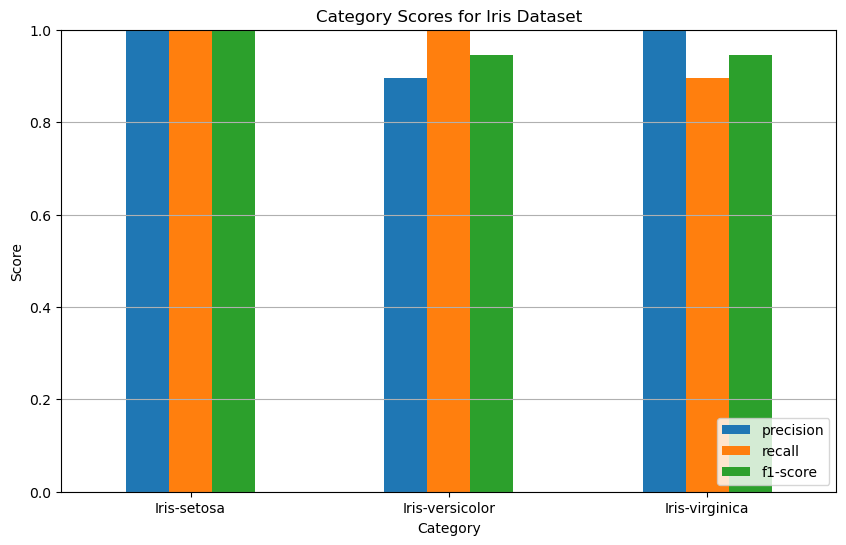

In [252]:
# Generate a classification report
report = classification_report(Y_test, Y_pred, output_dict=True)

# ## RESULT VISUALIZATION
# Convert the report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plotting
report_df = report_df.iloc[:-3, :3]  # Exclude support and average rows/columns
fig, ax = plt.subplots(figsize=(10, 6))
report_df.plot(kind='bar', ax=ax)
plt.title('Category Scores for Iris Dataset')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()